In [284]:
import pandas as pd
import matplotlib.pyplot as plt

# Data prep

## Names by state data prep

In [295]:
df = pd.read_csv('data/namesbystate/namesbystate_filtered.csv')
df.head()

,state,name,count
0,NY,Mia,836
1,NY,Emma,830
2,NY,Sophia,821
3,NY,Olivia,777
4,NY,Isabella,691


In [297]:
df_ca = df[df['state'] == 'CA'].copy()
df_tx = df[df['state'] == 'TX'].copy()
df_ny = df[df['state'] == 'NY'].copy()
df_fl = df[df['state'] == 'FL'].copy()

def sample_names(df_state, n=1000, random_state=42):
    df_expanded = df_state.loc[df_state.index.repeat(df_state['count'])].reset_index(drop=True) #dis-agregate
    df_expanded = df_expanded[['state', 'name']]  # Remove count column
    sampled = df_expanded.sample(n=n, random_state=random_state)
    return sampled

df_ca_sampled = sample_names(df_ca, n=1000, random_state=42).reset_index(drop=True)
df_tx_sampled = sample_names(df_tx, n=1000, random_state=42).reset_index(drop=True)
df_ny_sampled = sample_names(df_ny, n=1000, random_state=42).reset_index(drop=True)
df_fl_sampled = sample_names(df_fl, n=1000, random_state=42).reset_index(drop=True)

In [298]:
df_ca_agg = (df_ca_sampled.groupby('name')
                          .count()
                          .reset_index()
                          .sort_values(by='state', ascending=False)
                          .rename(columns={'state': 'count'}))
df_tx_agg = (df_tx_sampled.groupby('name')
                          .count()
                          .reset_index()
                          .sort_values(by='state', ascending=False)
                          .rename(columns={'state': 'count'}))
df_fl_agg = (df_fl_sampled.groupby('name')
                          .count()
                          .reset_index()
                          .sort_values(by='state', ascending=False)
                          .rename(columns={'state': 'count'}))
df_ny_agg = (df_ny_sampled.groupby('name')
                          .count()
                          .reset_index()
                          .sort_values(by='state', ascending=False)
                          .rename(columns={'state': 'count'}))

Distribution of counts in CA


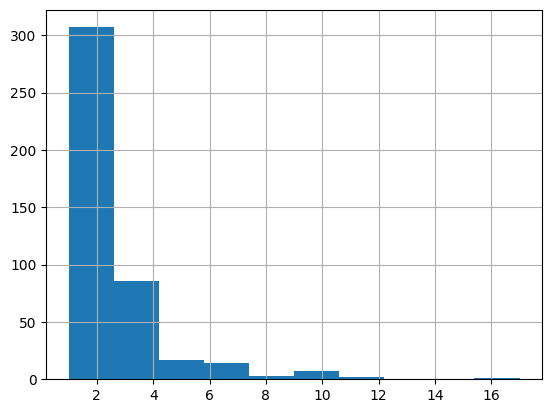

Unique names in CA: 437
--------------------------------------------------
Distribution of counts in TX


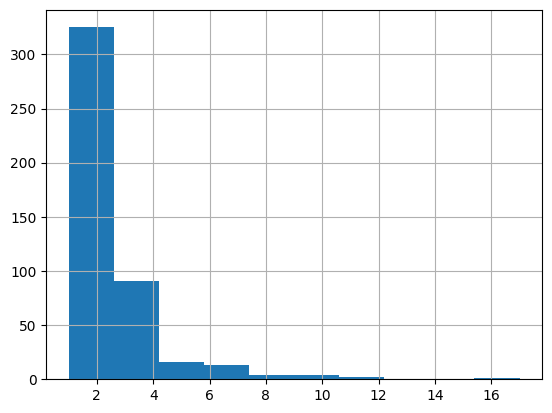

Unique names in TX: 456
--------------------------------------------------
Distribution of counts in NY


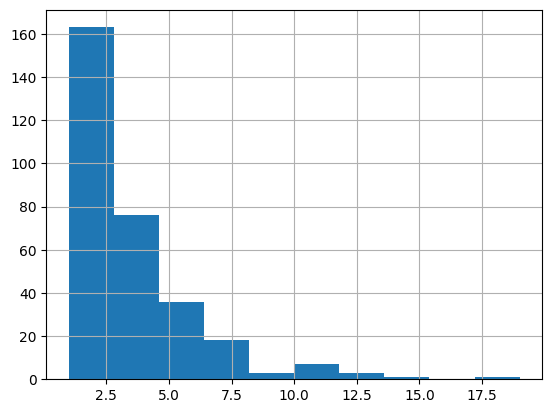

Unique names in NY: 308
--------------------------------------------------
Distribution of counts in FL


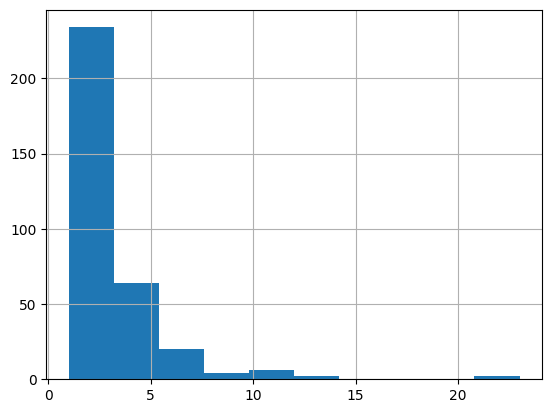

Unique names in FL: 332
--------------------------------------------------


In [299]:
# check distributions
print("Distribution of counts in CA")
df_ca_agg['count'].hist()
plt.show()
print('Unique names in CA:', df_ca_agg['name'].nunique())
print("-"*50)

print("Distribution of counts in TX")
df_tx_agg['count'].hist()
plt.show()
print('Unique names in TX:', df_tx_agg['name'].nunique())
print("-"*50)

print("Distribution of counts in NY")
df_ny_agg['count'].hist()
plt.show()
print('Unique names in NY:', df_ny_agg['name'].nunique())
print("-"*50)

print("Distribution of counts in FL")
df_fl_agg['count'].hist()
plt.show()
print('Unique names in FL:', df_fl_agg['name'].nunique())
print("-"*50)

In [300]:
#check unique across all states
print('Unique names across all states:', pd.concat([df_ca_agg['name'],df_tx_agg['name'],df_ny_agg['name'],df_fl_agg['name']]).nunique())
print("-"*50)
print('Shared names between states:', len(set(df_ca_agg['name']).intersection(set(df_tx_agg['name']).intersection(set(df_ny_agg['name']).intersection(set(df_fl_agg['name']))))))
print("-"*50)

print('Shared names between state CA and TX:', len(set(df_ca_agg['name']).intersection(set(df_tx_agg['name']))))
print('Shared names between state CA and NY:', len(set(df_ca_agg['name']).intersection(set(df_ny_agg['name']))))
print('Shared names between state CA and FL:', len(set(df_ca_agg['name']).intersection(set(df_fl_agg['name']))))
print('Shared names between state TX and NY:', len(set(df_tx_agg['name']).intersection(set(df_ny_agg['name']))))
print('Shared names between state TX and FL:', len(set(df_tx_agg['name']).intersection(set(df_fl_agg['name']))))
print('Shared names between state NY and FL:', len(set(df_ny_agg['name']).intersection(set(df_fl_agg['name']))))

Unique names across all states: 651
--------------------------------------------------
Shared names between states: 162
--------------------------------------------------
Shared names between state CA and TX: 302
Shared names between state CA and NY: 219
Shared names between state CA and FL: 258
Shared names between state TX and NY: 222
Shared names between state TX and FL: 257
Shared names between state NY and FL: 235


In [66]:
# add back state column for each agg dataframe
df_ca_agg['state'] = 'CA'
df_tx_agg['state'] = 'TX'
df_ny_agg['state'] = 'NY'
df_fl_agg['state'] = 'FL'

# concatenate agg dataframes and exports as csv
df_all_agg = pd.concat([df_ca_agg, df_tx_agg, df_ny_agg, df_fl_agg])
df_all_agg.to_csv('data/namesbystate/namesbystate_agg.csv', index=False)

## Soil type by area data prep

In [242]:
df = pd.read_csv('data/wilderness/wilderness_soil_count.csv')
df.head()

,Wilderness_Area,Soil_Type,count
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,3031
4,1,2,0


In [248]:
df_1 = df[df['Wilderness_Area'] == 1]
df_2 = df[df['Wilderness_Area'] == 2]
df_3 = df[df['Wilderness_Area'] == 3]
df_4 = df[df['Wilderness_Area'] == 4]

def sample_soils(df_state, n=1000, random_state=42):
    df_expanded = df_state.loc[df_state.index.repeat(df_state['count'])].reset_index(drop=True) #dis-agregate
    df_expanded = df_expanded[['Wilderness_Area', 'Soil_Type']]  # Remove count column
    sampled = df_expanded.sample(n=n, random_state=random_state)
    return sampled

seed = 42
df_1_sampled = sample_soils(df_1, n=1000, random_state=seed).reset_index(drop=True)
df_2_sampled = sample_soils(df_2, n=1000, random_state=seed).reset_index(drop=True)
df_3_sampled = sample_soils(df_3, n=1000, random_state=seed).reset_index(drop=True)
df_4_sampled = sample_soils(df_4, n=1000, random_state=seed).reset_index(drop=True)

In [249]:
df_1_agg = (df_1_sampled.groupby('Soil_Type')
                        .count()
                        .reset_index()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .rename(columns={'Wilderness_Area': 'count'}))
df_2_agg = (df_2_sampled.groupby('Soil_Type')
                        .count()
                        .reset_index()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .rename(columns={'Wilderness_Area': 'count'}))
df_3_agg = (df_3_sampled.groupby('Soil_Type')
                        .count()
                        .reset_index()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .rename(columns={'Wilderness_Area': 'count'}))
df_4_agg = (df_4_sampled.groupby('Soil_Type')
                        .count()
                        .reset_index()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .rename(columns={'Wilderness_Area': 'count'}))

Distribution of counts in wilderness area 1


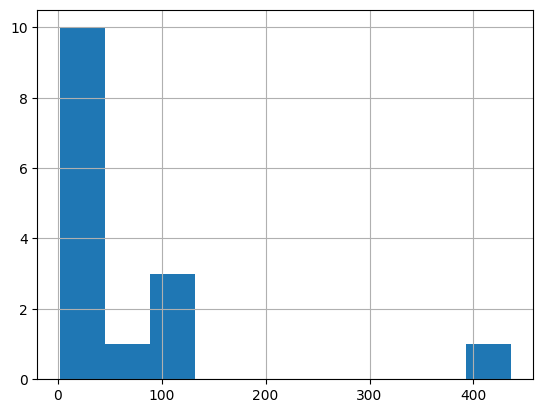

Unique names in wilderness area 1: 15
--------------------------------------------------
Distribution of counts in wilderness area 2


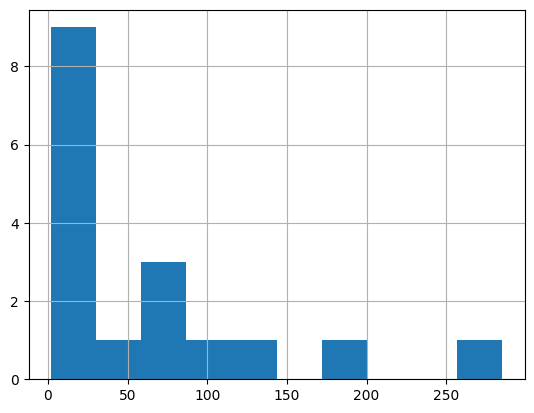

Unique names in wilderness area 2: 17
--------------------------------------------------
Distribution of counts in wilderness area 3


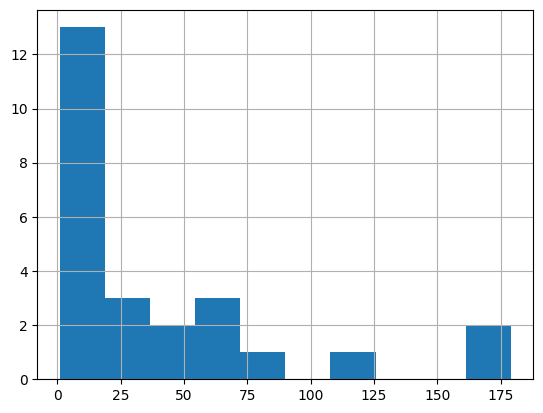

Unique names in wilderness area 3: 25
--------------------------------------------------
Distribution of counts in wilderness area 4


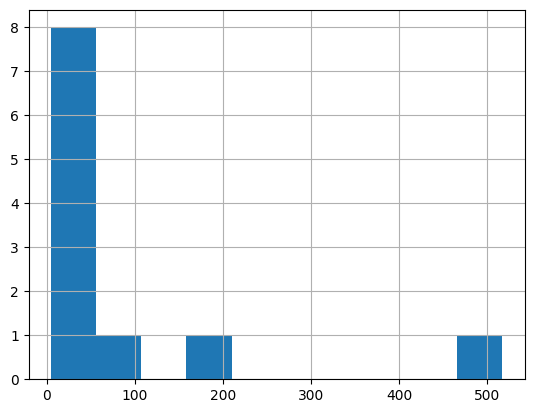

Unique names in wilderness area 4: 11
--------------------------------------------------


In [250]:
# check distributions
print("Distribution of counts in wilderness area 1")
df_1_agg['count'].hist()
plt.show()
print('Unique names in wilderness area 1:', df_1_agg['Soil_Type'].nunique())
print("-"*50)

print("Distribution of counts in wilderness area 2")
df_2_agg['count'].hist()
plt.show()
print('Unique names in wilderness area 2:', df_2_agg['Soil_Type'].nunique())
print("-"*50)

print("Distribution of counts in wilderness area 3")
df_3_agg['count'].hist()
plt.show()
print('Unique names in wilderness area 3:', df_3_agg['Soil_Type'].nunique())
print("-"*50)

print("Distribution of counts in wilderness area 4")
df_4_agg['count'].hist()
plt.show()
print('Unique names in wilderness area 4:', df_4_agg['Soil_Type'].nunique())
print("-"*50)

In [254]:
#check unique across all states
print('Unique soil types  across all areas:', pd.concat([df_1_agg['Soil_Type'],df_2_agg['Soil_Type'],df_3_agg['Soil_Type'],df_4_agg['Soil_Type']]).nunique())
print("-"*50)

print('Shared soil types between all areas:', len(set(df_1_agg['Soil_Type']).intersection(set(df_2_agg['Soil_Type']).intersection(set(df_3_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))))

print('Shared soil types between area 1 and area 2:', len(set(df_1_agg['Soil_Type']).intersection(set(df_2_agg['Soil_Type']))))
print('Shared soil types between area 1 and area 3:', len(set(df_1_agg['Soil_Type']).intersection(set(df_3_agg['Soil_Type']))))
print('Shared soil types between area 1 and area 4:', len(set(df_1_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))
print('Shared soil types between area 2 and area 3:', len(set(df_2_agg['Soil_Type']).intersection(set(df_3_agg['Soil_Type']))))
print('Shared soil types between area 2 and area 4:', len(set(df_2_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))
print('Shared soil types between area 3 and area 4:', len(set(df_3_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))

Unique names across all states: 36
--------------------------------------------------
Shared soil types between all areas: 0
Shared soil types between area 1 and area 2: 11
Shared soil types between area 1 and area 3: 8
Shared soil types between area 1 and area 4: 1
Shared soil types between area 2 and area 3: 13
Shared soil types between area 2 and area 4: 1
Shared soil types between area 3 and area 4: 7


In [252]:
# add back state column for each agg dataframe
df_1_agg['Wilderness_Area'] = 1
df_2_agg['Wilderness_Area'] = 2
df_3_agg['Wilderness_Area'] = 3
df_4_agg['Wilderness_Area'] = 4

# concatenate agg dataframes and exports as csv
df_all_agg = pd.concat([df_1_agg, df_2_agg, df_3_agg, df_4_agg])
df_all_agg.to_csv('data/wilderness/wilderness_agg.csv', index=False)

## Word types by article category

In [256]:
df = pd.read_csv('data/twenty+newsgroups/newsgroup_words_1000.csv')
df.head()

,category,POS,word,count
0,sci.space,ADJ,subject,1013
1,sci.space,ADJ,new,367
2,sci.space,ADJ,solar,264
3,sci.space,ADJ,nasa,255
4,sci.space,ADJ,usenet,233


In [257]:
POS = 'ADJ'
df_space = df[(df['category']=='sci.space') & (df['POS']==POS)].copy()
df_religion = df[(df['category']=='soc.religion.christian') & (df['POS']==POS)].copy()

def sample_words(df_category, n=1000, random_state=42):
    df_expanded = df_category.loc[df_category.index.repeat(df_category['count'])].reset_index(drop=True) #dis-agregate
    df_expanded = df_expanded[['category', 'word']]  # Remove count column
    sampled = df_expanded.sample(n=n, random_state=random_state)
    return sampled

df_space_sampled = sample_words(df_space, n=1000, random_state=42).reset_index(drop=True)
df_religion_sampled = sample_words(df_religion, n=1000, random_state=42).reset_index(drop=True)


In [258]:
df_space_agg = (df_space_sampled.groupby('word')
                        .count()
                        .reset_index()
                        .sort_values(by='category', ascending=False)
                        .rename(columns={'category': 'count'}))

df_religion_agg = (df_religion_sampled.groupby('word')
                        .count()
                        .reset_index()
                        .sort_values(by='category', ascending=False)
                        .rename(columns={'category': 'count'}))

Distribution of counts in sci.space


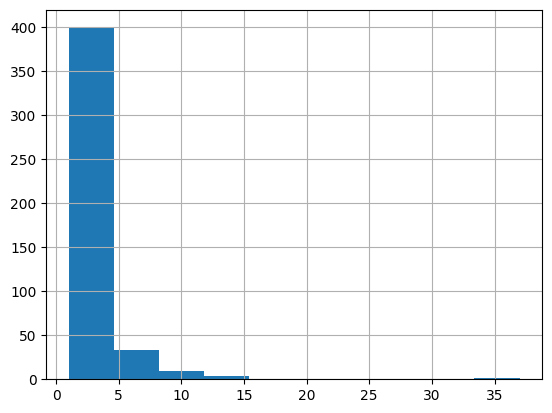

Unique words in sci.space: 447
--------------------------------------------------
Distribution of counts in soc.religion.christian


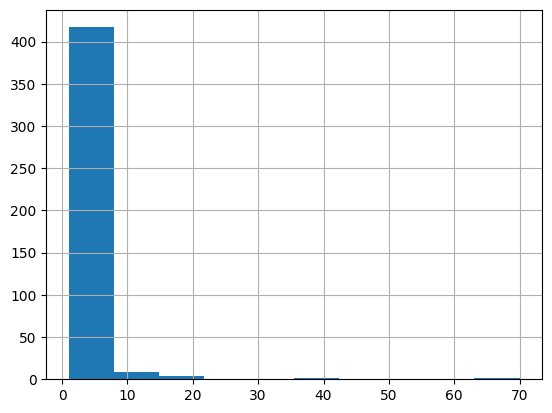

Unique words in soc.religion.christian: 432
--------------------------------------------------


In [259]:
# check distributions
print("Distribution of counts in sci.space")
df_space_agg['count'].hist()
plt.show()
print('Unique words in sci.space:', df_space_agg['word'].nunique())
print("-"*50)

print("Distribution of counts in soc.religion.christian")
df_religion_agg['count'].hist()
plt.show()
print('Unique words in soc.religion.christian:', df_religion_agg['word'].nunique())
print("-"*50)

In [261]:
# print unique words across all categories
print('Unique words across all categories:', pd.concat([df_space_agg['word'],df_religion_agg['word']]).nunique())
print("-"*50)
print('Shared words across all categories:', len(set(df_space_agg['word']).intersection(set(df_religion_agg['word']))))
print("-"*50)

Unique words across all categories: 740
--------------------------------------------------
Shared words across all categories: 139
--------------------------------------------------


In [190]:
# add back category column for each agg dataframe
df_space_agg['category'] = 'sci.space'
df_religion_agg['category'] = 'soc.religion.christian'

# concatenate agg dataframes and exports as csv
df_all_agg = pd.concat([df_space_agg, df_religion_agg])
df_all_agg.to_csv('data/twenty+newsgroups/newsgroup_verb_agg.csv', index=False)

# Results

## Names by state

In [285]:
dep_predictions = pd.read_csv('scripts/results_namesbystate_final/tables/dependent_predictions.csv')
ind_predictions = pd.read_csv('scripts/results_namesbystate_final/tables/independent_predictions.csv')
model_comparison = pd.read_csv('scripts/results_namesbystate_final/tables/model_comparison.csv')
param_estimates = pd.read_csv('scripts/results_namesbystate_final/tables/parameter_estimates.csv')

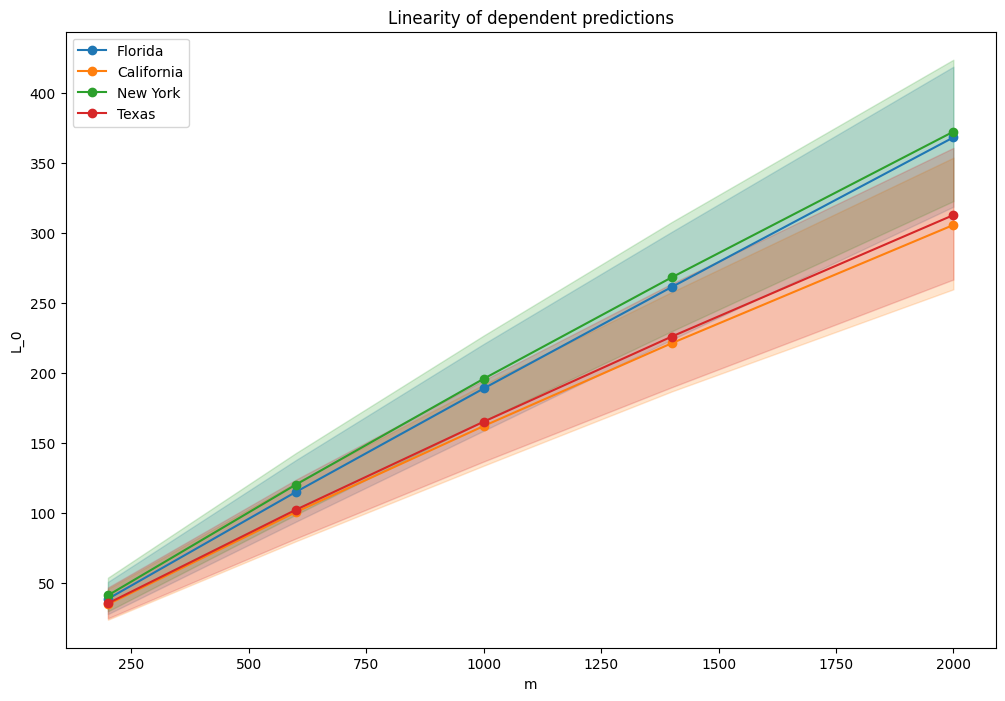

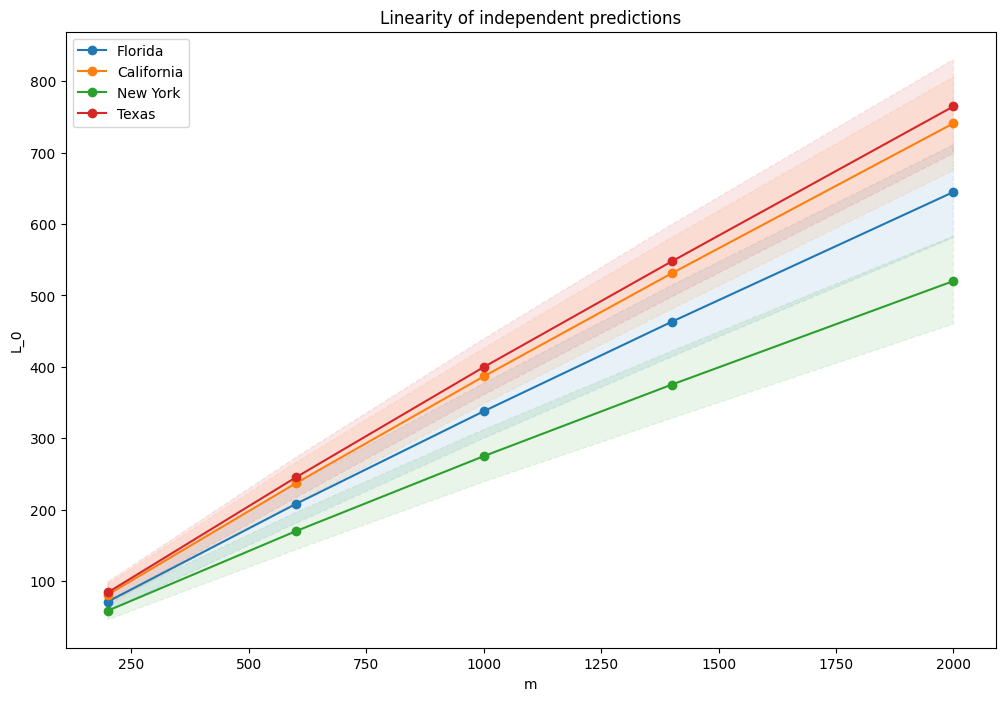

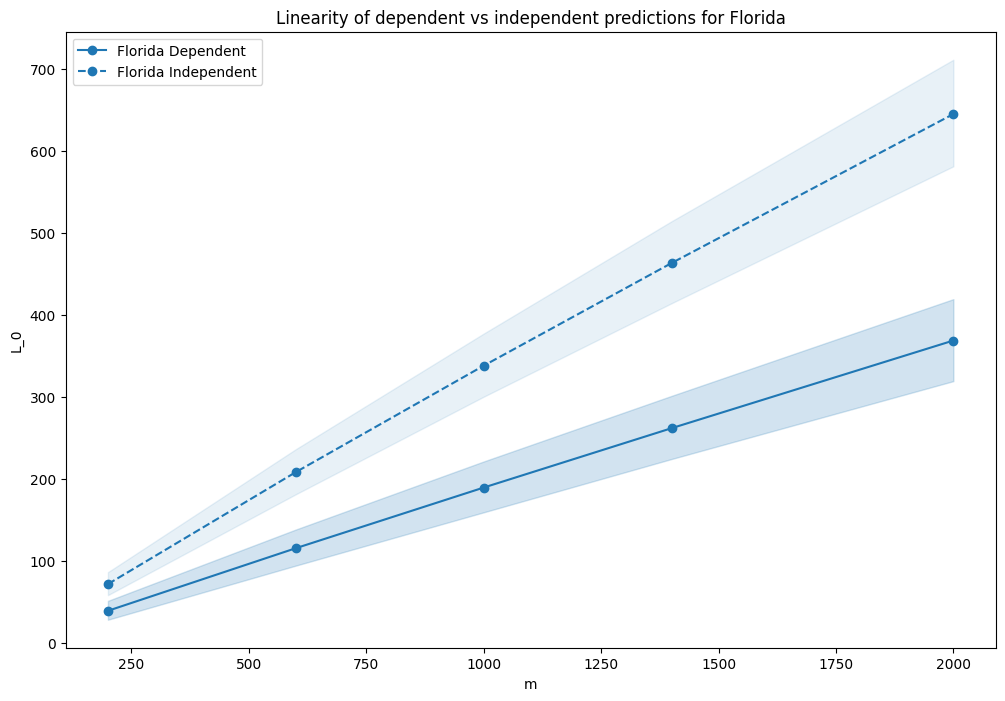

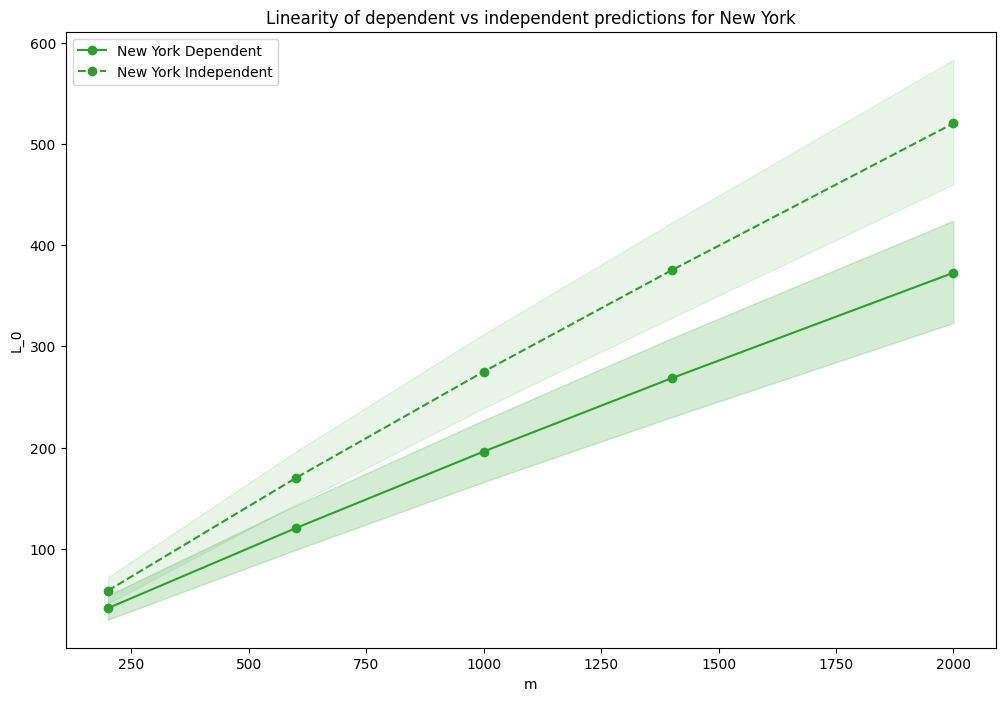

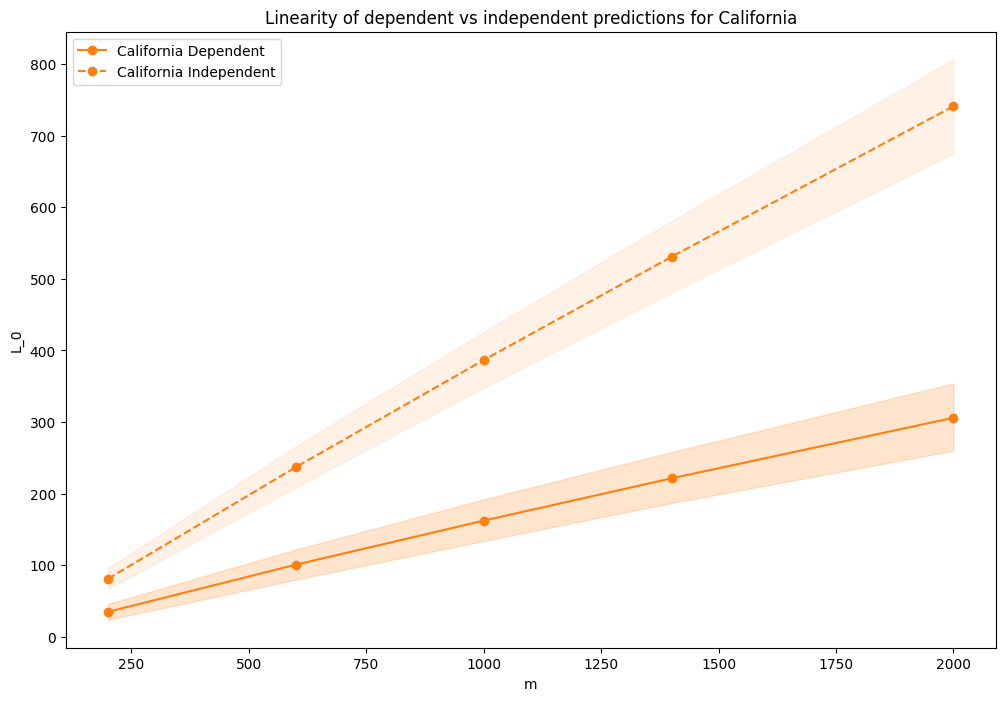

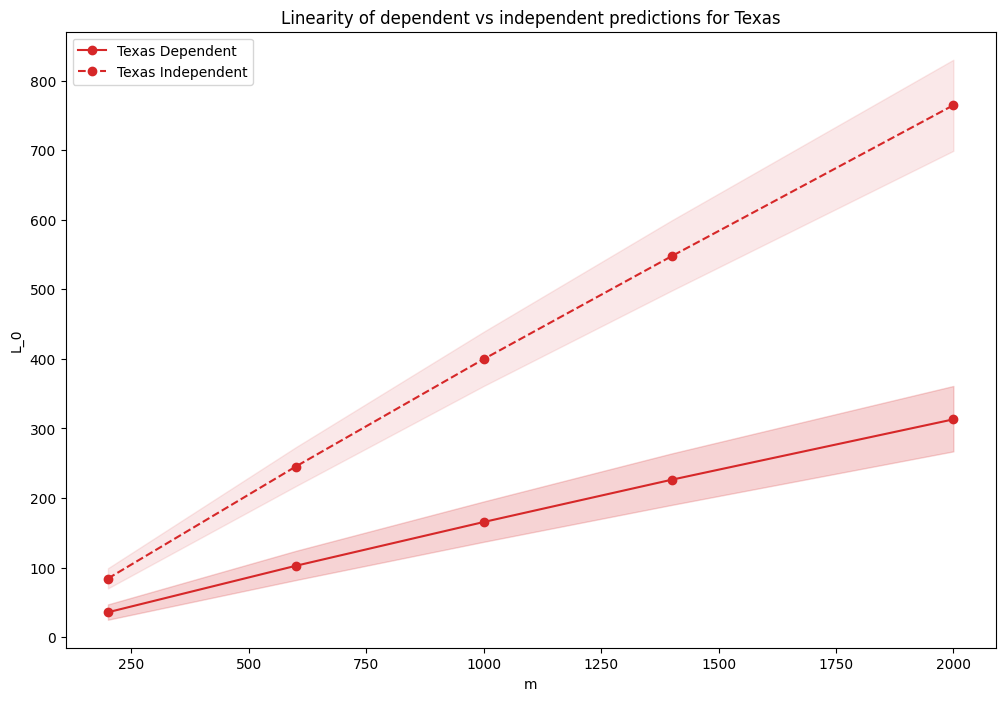

In [ ]:
## Linearity Dependent
def extract_dep(arr, col='L_0'):
    vals = arr[['m', col, 'HPD']].copy()
    # HPD is assumed as a tuple string, e.g. "(28, 51)"
    hpds = vals['HPD'].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    return vals

fl_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='FL'])
ca_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='CA'])
ny_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='NY'])
tx_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='TX'])

## Linearity Independent 
def extract_ind(arr, col_l0, col_hpd):
    vals = arr[['m', col_l0, col_hpd]].copy()
    hpds = vals[col_hpd].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    vals = vals.rename(columns={col_l0: 'L_0'})
    return vals

fl_ind_df = extract_ind(ind_predictions, 'FL_L0', 'FL_HPD')
ca_ind_df = extract_ind(ind_predictions, 'CA_L0', 'CA_HPD')
ny_ind_df = extract_ind(ind_predictions, 'NY_L0', 'NY_HPD')
tx_ind_df = extract_ind(ind_predictions, 'TX_L0', 'TX_HPD')

# Plot lines for dependent predictions with shaded confidence intervals
plt.figure(figsize=(12, 8))
for df, label, color in zip([fl_dep_df, ca_dep_df, ny_dep_df, tx_dep_df],
                            ['Florida', 'California', 'New York', 'Texas'],
                            ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']):
    plt.plot(df['m'], df['L_0'], label=label, marker='o', color=color)
    plt.fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.2)
plt.xlabel('m')
plt.ylabel('L_0')
plt.title('Linearity of dependent predictions')
plt.legend()
plt.show()

# Plot lines for independent predictions with HPD confidence intervals
plt.figure(figsize=(12, 8))
for df, label, color in zip([fl_ind_df, ca_ind_df, ny_ind_df, tx_ind_df],
                            ['Florida', 'California', 'New York', 'Texas'],
                            ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']):
    plt.plot(df['m'], df['L_0'], label=label, marker='o', color=color)
    plt.fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.1, linestyle='dashed')
plt.xlabel('m')
plt.ylabel('L_0')
plt.title('Linearity of independent predictions')
plt.legend()
plt.show()

# plot lines per state (dependent with CIs vs independent with CIs)
for state_label, dep_df, ind_df, color in zip(
    ['Florida', 'New York', 'California', 'Texas'],
    [fl_dep_df, ny_dep_df, ca_dep_df, tx_dep_df],
    [fl_ind_df, ny_ind_df, ca_ind_df, tx_ind_df],
    ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
):
    plt.figure(figsize=(12, 8))
    plt.plot(dep_df['m'], dep_df['L_0'], label=f'{state_label} Dependent', marker='o', color=color)
    plt.fill_between(dep_df['m'], dep_df['lower'], dep_df['upper'], color=color, alpha=0.2)
    plt.plot(ind_df['m'], ind_df['L_0'], label=f'{state_label} Independent', marker='o', color=color, linestyle='dashed')
    plt.fill_between(ind_df['m'], ind_df['lower'], ind_df['upper'], color=color, alpha=0.1)
    plt.xlabel('m')
    plt.ylabel('L_0')
    plt.title(f'Linearity of dependent vs independent predictions for {state_label}')
    plt.legend()
    plt.show()


<Axes: xlabel='m'>

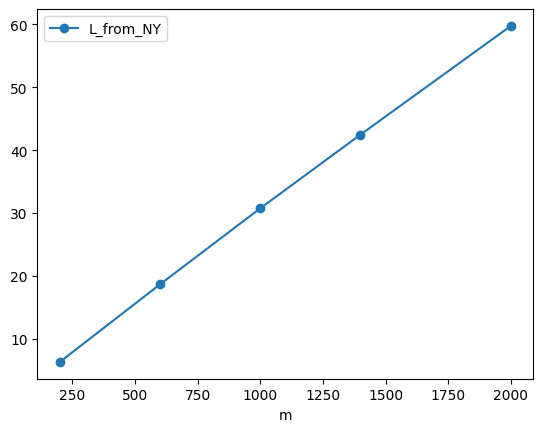

In [294]:
dep_predictions[dep_predictions['state']=='FL'][['m', 'L_from_NY']].plot(x='m', y='L_from_NY', kind='line', marker='o')

## News

In [308]:
dep_predictions = pd.read_csv('scripts/results_news_final/tables/dependent_predictions.csv')
ind_predictions = pd.read_csv('scripts/results_news_final/tables/independent_predictions.csv')
model_comparison = pd.read_csv('scripts/results_news_final/tables/model_comparison.csv')
param_estimates = pd.read_csv('scripts/results_news_final/tables/parameter_estimates.csv')

In [309]:
param_estimates

,model,state,theta_0,theta_j,d_0,d_j,num_base_tables,num_unique_dishes
0,Independent,sci.space,449.80 ± 63.65,1358.89 ± 65.76,0.6411 ± 0.0408,0.4307 ± 0.0430,640.0,640.0
1,Independent,soc.religion.christian,658.31 ± 36.35,740.57 ± 40.01,0.3406 ± 0.0551,0.5575 ± 0.0452,612.0,612.0
2,Dependent,ALL (shared),559.88 ± 121.00,648.90 ± 54.45,0.8485 ± 0.0659,0.4758 ± 0.1261,1040.0,1040.0
